In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns

# Test Time Wait-K

In [3]:
# segment size 320ms, laal_c measured on A6000
df1 = pd.DataFrame(columns=['K', 'BLEU', 'LAAL', 'LAAL_c', 'segment size'])
df1['segment size'] = [320] * 7
df1['K'] = [1, 3, 5, 7, 9, 11, 13]
df1['BLEU'] = [24.0, 25.5, 28.5, 29.7, 30.8, 31.3, 31.6]
df1['LAAL'] = [1220, 1309, 1683, 2139, 2578, 2972, 3360]
df1['LAAL_c'] = [2057, 2024, 2466, 2977, 3460, 3923, 4395]

In [4]:
# segment size 640ms, laal_c measured on A6000
df2 = pd.DataFrame(columns=['K', 'BLEU', 'LAAL', 'LAAL_c', 'segment size'])
df2['segment size'] = [640] * 7
df2['K'] = [1, 2, 3, 4, 5, 6, 7]
df2['BLEU'] = [28.2, 30.9, 31.6, 32.1, 32.4, 32.6, 32.8]
df2['LAAL'] = [2095, 2428, 2835, 3219, 3573, 3892, 4173]
df2['LAAL_c'] = [2531, 2883, 3349, 3807, 4253, 4656, 5056]

In [5]:
df = pd.concat([df1, df2], ignore_index=True)

In [6]:
df

,K,BLEU,LAAL,LAAL_c,segment size
0,1,24.0,1220,2057,320
1,3,25.5,1309,2024,320
2,5,28.5,1683,2466,320
3,7,29.7,2139,2977,320
4,9,30.8,2578,3460,320
5,11,31.3,2972,3923,320
6,13,31.6,3360,4395,320
7,1,28.2,2095,2531,640
8,2,30.9,2428,2883,640
9,3,31.6,2835,3349,640


In [7]:
df

,K,BLEU,LAAL,LAAL_c,segment size
0,1,24.0,1220,2057,320
1,3,25.5,1309,2024,320
2,5,28.5,1683,2466,320
3,7,29.7,2139,2977,320
4,9,30.8,2578,3460,320
5,11,31.3,2972,3923,320
6,13,31.6,3360,4395,320
7,1,28.2,2095,2531,640
8,2,30.9,2428,2883,640
9,3,31.6,2835,3349,640


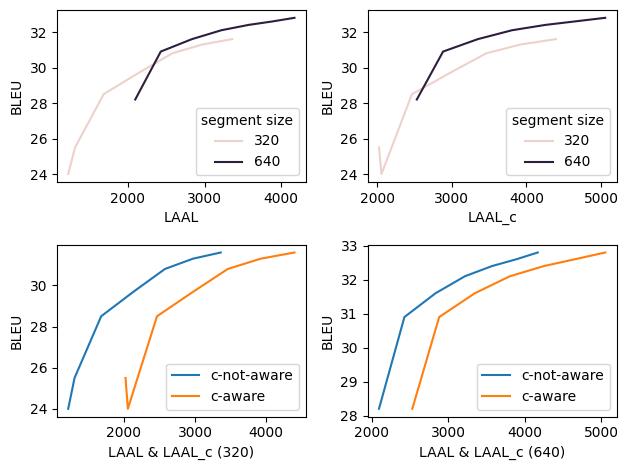

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2)

sns.lineplot(df, x='LAAL', y='BLEU', hue='segment size', ax=axs[0, 0])
sns.lineplot(df, x='LAAL_c', y='BLEU', hue='segment size', ax=axs[0, 1])

sns.lineplot(x=pd.concat([df1['LAAL'], df1['LAAL_c']]), y=pd.concat([df1['BLEU'], df1['BLEU']]), hue=['c-not-aware'] * 7 + ['c-aware'] * 7, ax=axs[1, 0])
axs[1, 0].set_xlabel('LAAL & LAAL_c (320)')

sns.lineplot(x=pd.concat([df2['LAAL'], df2['LAAL_c']]), y=pd.concat([df2['BLEU'], df2['BLEU']]), hue=['c-not-aware'] * 7 + ['c-aware'] * 7, ax=axs[1, 1])
axs[1, 1].set_xlabel('LAAL & LAAL_c (640)')

plt.tight_layout()
plt.savefig('laal_bleu.png', dpi=300)

# Train Wav2Vec 2.0 (bi vs uni) without train waitk

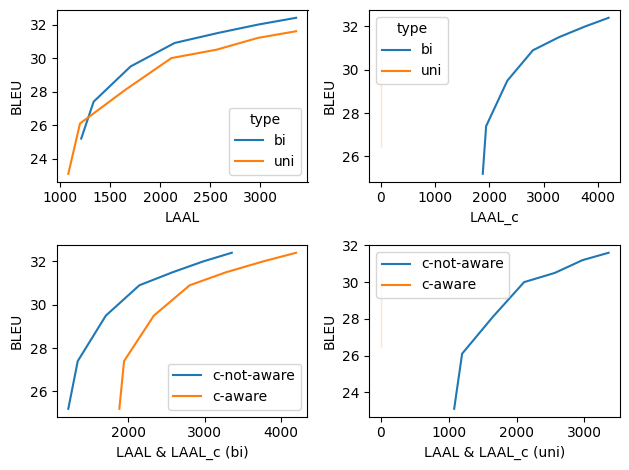

In [10]:
# segment size 320ms, laal_c measured on A6000
df1 = pd.DataFrame(columns=['K', 'BLEU', 'LAAL', 'LAAL_c', 'type'])
df1['type'] = ['bi'] * 7
df1['K'] = [1, 3, 5, 7, 9, 11, 13]
df1['BLEU'] = [25.2, 27.4, 29.5, 30.9, 31.5, 32.0, 32.4]
df1['LAAL'] = [1210, 1334, 1703, 2143, 2579, 2980, 3356]
df1['LAAL_c'] = [1880, 1942, 2333, 2804, 3280, 3766, 4200]
# segment size 640ms, laal_c measured on A6000
df2 = pd.DataFrame(columns=['K', 'BLEU', 'LAAL', 'LAAL_c', 'type'])
df2['type'] = ['uni'] * 7
df2['K'] = [1, 3, 5, 7, 9, 11, 13]
df2['BLEU'] = [23.1, 26.1, 28.1, 30.0, 30.5, 31.2, 31.6]
df2['LAAL'] = [1081, 1198, 1649, 2111, 2562, 2973, 3356]
df2['LAAL_c'] = [0] * 7
df = pd.concat([df1, df2], ignore_index=True)

fig, axs = plt.subplots(nrows=2, ncols=2)

sns.lineplot(df, x='LAAL', y='BLEU', hue='type', ax=axs[0, 0])
sns.lineplot(df, x='LAAL_c', y='BLEU', hue='type', ax=axs[0, 1])

sns.lineplot(x=pd.concat([df1['LAAL'], df1['LAAL_c']]), y=pd.concat([df1['BLEU'], df1['BLEU']]), hue=['c-not-aware'] * 7 + ['c-aware'] * 7, ax=axs[1, 0])
axs[1, 0].set_xlabel('LAAL & LAAL_c (bi)')

sns.lineplot(x=pd.concat([df2['LAAL'], df2['LAAL_c']]), y=pd.concat([df2['BLEU'], df2['BLEU']]), hue=['c-not-aware'] * 7 + ['c-aware'] * 7, ax=axs[1, 1])
axs[1, 1].set_xlabel('LAAL & LAAL_c (uni)')

plt.tight_layout()
plt.savefig('train_w2v2_stage2_laal_bleu.png', dpi=300)

# Power law fit of loss curve

In [1]:
import wandb

In [19]:
api = wandb.Api()
bi_run = api.run("simulst/en-es/vyaj7ubh")
uni_run = api.run("simulst/en-es/g6scftzw")

In [20]:
bi_val_loss = bi_run.history()["val_loss"]
bi_val_loss = bi_val_loss[bi_val_loss.notna()]

In [21]:
uni_val_loss = uni_run.history()["val_loss"]
uni_val_loss = uni_val_loss[uni_val_loss.notna()]

In [25]:
uni_val_loss.to_numpy()

array([5.13461733, 4.41203165, 4.00904179, 3.8820107 , 3.0132978 ,
       2.83514261, 2.79379511, 2.72081947, 2.69373751, 2.65682483,
       2.63281226, 2.6204052 , 2.54963565, 2.5241437 , 2.48390746,
       2.36840391, 2.30460358, 2.27023244, 2.27337885, 2.25686741,
       2.27716804, 2.25209188, 2.24911237, 2.2274766 , 2.23416758,
       2.22990322, 2.21487093, 2.21247101, 2.2174542 , 2.21468878,
       2.22975731, 2.21451592, 2.2106297 , 2.21310306, 2.19909048,
       2.21275544])

In [26]:
def fit(y):
    import numpy as np
    from scipy.optimize import curve_fit

    # Define the power law function
    def power_law(x, a, b):
        return a * np.power(x, b)

    # Generate some example data
    x = np.arange(y.shape[0])
    y = y.to_numpy()

    # Fit the power law curve to the data
    params, covariance = curve_fit(power_law, x, y)

    a, b = params

    # Plot the data and the fitted curve
    plt.scatter(x, y, label='Data')
    plt.plot(x, power_law(x, a, b), color='red', label='Fitted curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Power Law Curve Fitting')
    plt.show()

    return params, covariance

In [27]:
fit(bi_val_loss)

/tmp/ipykernel_234304/586420643.py:7: RuntimeWarning: divide by zero encountered in power
  return a * np.power(x, b)


(array([2.00242751e+00, 5.19635574e-09]),
 array([[ 0.23472319, -0.04299439],
        [-0.04299439,  0.00953757]]))

# Fix Stage 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stage2_uni = np.array([[3.3, 514], [13.5, 1182], [18.6, 1625], [21.6, 2116], [21.8, 2116], [20.5, 2958], [24.1, 3332]])
stage3_uni = np.array([[14.0, 678], [21.8, 1047], [23.9, 1546], [25.1, 2029], [26.9, 2491], [27.8, 2913], [28.0, 3312]])
stage2_bi = np.array([[23.1, 1081], [26.1, 1198], [28.1, 1649], [30.0, 2111], [30.5, 2562], [31.2, 2973], [31.6, 3356]])

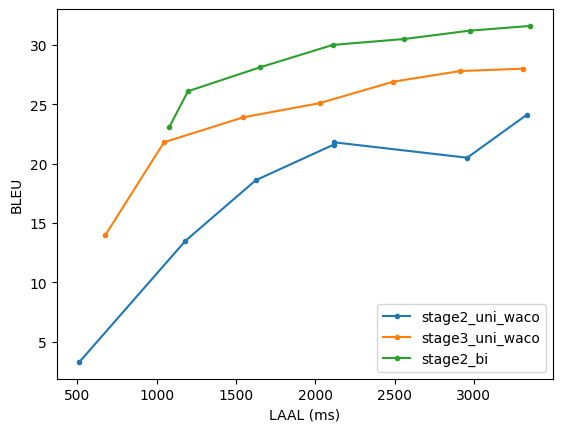

In [13]:
plt.plot(stage2_uni[:, 1], stage2_uni[:, 0], label='stage2_uni_waco', marker='.')
plt.plot(stage3_uni[:, 1], stage3_uni[:, 0], label='stage3_uni_waco', marker='.')
plt.plot(stage2_bi[:, 1], stage2_bi[:, 0], label='stage2_bi', marker='.')
plt.xlabel('LAAL (ms)')
plt.ylabel('BLEU')
plt.legend()
plt.show()

# benchmark-30s

In [4]:
laal = np.array([-813, -194, 430, 1058, 1689, 2323, 2959])

In [17]:
laal_c = {
    'bi' : np.array([2730, 3308, 5071, 5225, 5340, 6032, 6543]),
    'uni': np.array([2195, 2810, 3457, 4049, 4710, 5360, 5961])
}

In [18]:
c_diff = {
    'bi' : laal_c['bi'] - laal,
    'uni': laal_c['uni'] - laal
}

/tmp/ipykernel_457889/1051652657.py:1: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(laal_c, markers='.', markersize=20)


Text(0.5, 1.0, 'Computation aware LAAL of bi and uni with oracle generation')

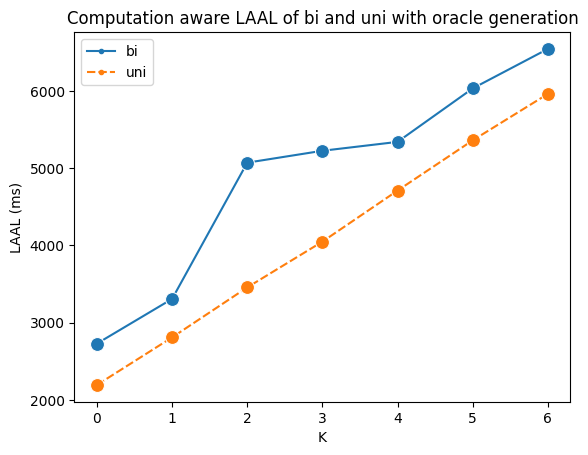

In [16]:
sns.lineplot(laal_c, markers='.', markersize=20)
plt.ylabel('LAAL (ms)')
plt.xlabel('K')
plt.title('Computation aware LAAL of bi and uni with oracle generation')

/tmp/ipykernel_457889/2356242194.py:1: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(c_diff, markers='.', markersize=20)


Text(0.5, 1.0, 'Computation overhead of bi and uni with oracle generation')

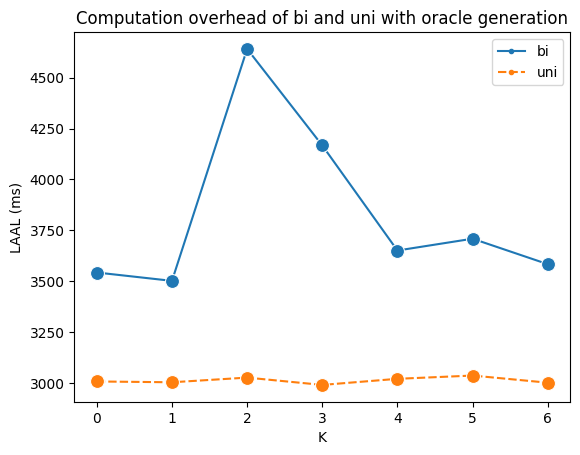

In [20]:
sns.lineplot(c_diff, markers='.', markersize=20)
plt.ylabel('LAAL (ms)')
plt.xlabel('K')
plt.title('Computation overhead of bi and uni with oracle generation')

# Main Results

## BLEU - LAAL_CA

In [2]:
colors = {
    'uni': 'green',
    'bi': 'orange',
    'edatt': 'grey',
    'alignatt': 'blue',
}

### Wait-K (320ms)

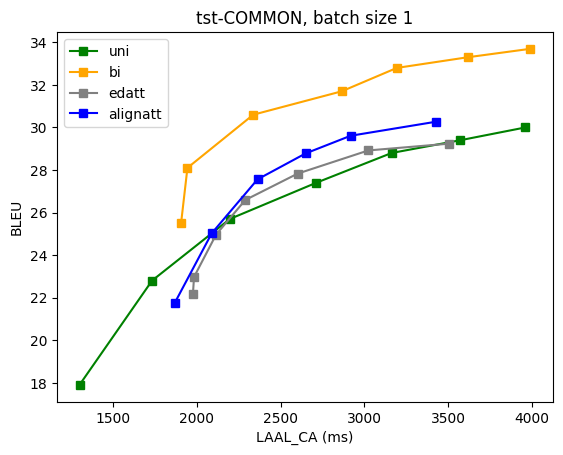

In [5]:
# tst-COMMON, bsz 1
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [17.9, 22.8, 25.7, 27.4, 28.8, 29.4, 30.0]
df['LAAL_CA'] = [1300, 1733, 2198, 2713, 3163, 3573, 3961]
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [25.5, 28.1, 30.6, 31.7, 32.8, 33.3, 33.7]
df['LAAL_CA'] = [1906, 1944, 2337, 2865, 3194, 3616, 3992]
dfs['bi'] = df

## edatt
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.15, 22.97, 24.96, 26.59, 27.83, 28.92, 29.24]
df['LAAL_CA'] = [1976.6, 1983.4, 2114.9, 2289.4, 2602.0, 3024.1, 3508.5]
dfs['edatt'] = df

## alignatt
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [21.75, 25.02, 27.56, 28.78, 29.61, 30.27]
df['LAAL_CA'] = [1868.2, 2088.7, 2362.4, 2649.7, 2918.3, 3427.8]
dfs['alignatt'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON, batch size 1')
plt.legend()

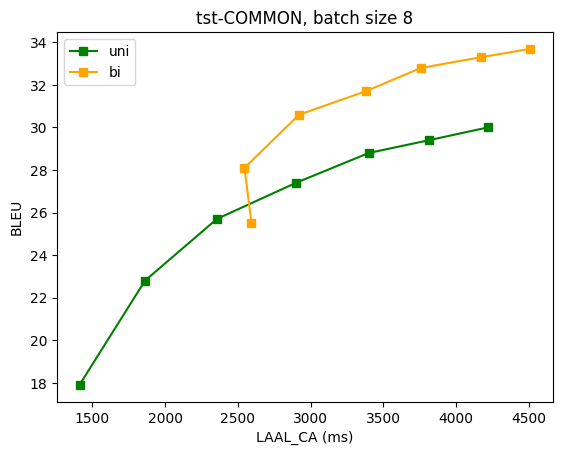

In [6]:
# tst-COMMON, bsz 8
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [17.9, 22.8, 25.7, 27.4, 28.8, 29.4, 30.0]
df['LAAL_CA'] = [1413, 1863, 2357, 2901, 3400, 3813, 4216]
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [25.5, 28.1, 30.6, 31.7, 32.8, 33.3, 33.7]
df['LAAL_CA'] = [2594, 2546, 2921, 3378, 3759, 4168, 4511]
dfs['bi'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON, batch size 8')
plt.legend()

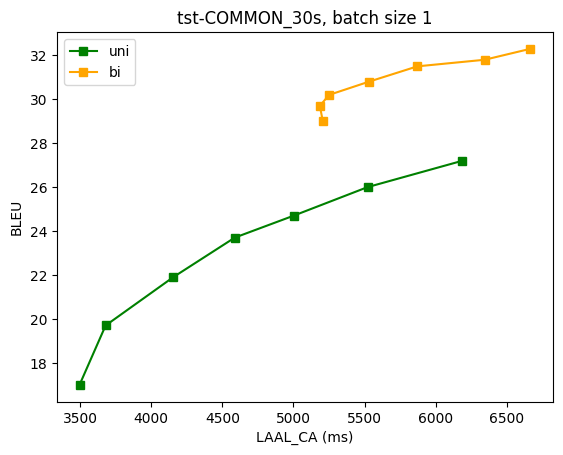

In [7]:
# tst-COMMON_30s, bsz 1
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [17.0, 19.7, 21.9, 23.7, 24.7, 26.0, 27.2]
df['LAAL_CA'] = [3497, 3680, 4155, 4587, 5001, 5520, 6186]
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [29.0, 29.7, 30.2, 30.8, 31.5, 31.8, 32.3]
df['LAAL_CA'] = [5206, 5185, 5250, 5529, 5870, 6343, 6665]
dfs['bi'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 1')
plt.legend()

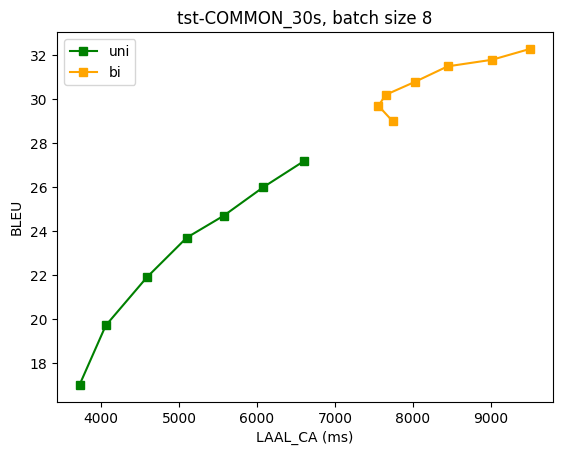

In [8]:
# tst-COMMON_30s, bsz 8
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [17.0, 19.7, 21.9, 23.7, 24.7, 26.0, 27.2]
df['LAAL_CA'] = [3724, 4060, 4589, 5099, 5574, 6082, 6609]
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [29.0, 29.7, 30.2, 30.8, 31.5, 31.8, 32.3]
df['LAAL_CA'] = [7741, 7559, 7649, 8030, 8446, 9016, 9509]
dfs['bi'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 8')
plt.legend()

### Wait-K (1000ms)

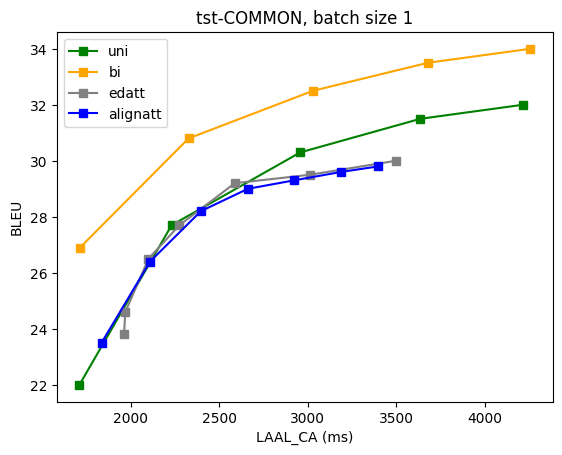

In [7]:
# tst-COMMON, bsz 1
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.0, 27.7, 30.3, 31.5, 32.0]
df['LAAL_CA'] = [1710, 2231, 2958, 3637, 4215]
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [26.9, 30.8, 32.5, 33.5, 34.0]
df['LAAL_CA'] = [1713, 2327, 3030, 3679, 4258]
dfs['bi'] = df

## edatt
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [23.8, 24.6, 26.5, 27.7, 29.2, 29.5, 30.0]
df['LAAL_CA'] = [1962, 1969, 2100, 2275, 2588, 3012, 3498]
dfs['edatt'] = df

## alignatt
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [23.5, 26.4, 28.2, 29.0, 29.3, 29.6, 29.8]
df['LAAL_CA'] = [1835, 2109, 2396, 2662, 2922, 3187, 3399]
dfs['alignatt'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON, batch size 1')
plt.legend()

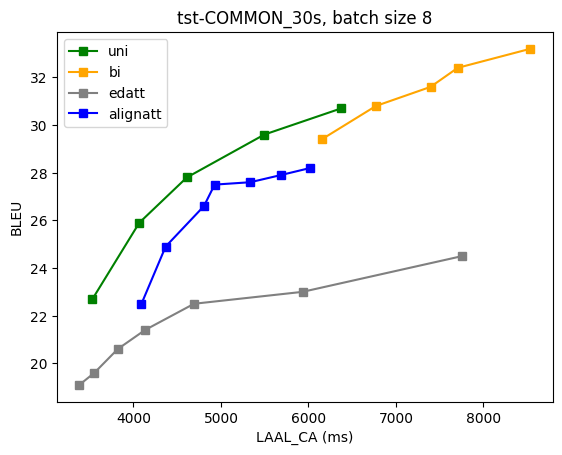

In [8]:
# tst-COMMON_30s, bsz 8
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.7, 25.9, 27.8, 29.6, 30.7]
df['LAAL_CA'] = [3532, 4067, 4610, 5496, 6375]
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [29.4, 30.8, 31.6, 32.4, 33.2]
df['LAAL_CA'] = [6152, 6771, 7395, 7706, 8536]
dfs['bi'] = df

## edatt
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [19.1, 19.6, 20.6, 21.4, 22.5, 23.0, 24.5]
df['LAAL_CA'] = [3383, 3553, 3821, 4133, 4693, 5933, 7756]
dfs['edatt'] = df

## alignatt
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.5, 24.9, 26.6, 27.5, 27.6, 27.9, 28.2]
df['LAAL_CA'] = [4092, 4368, 4806, 4928, 5335, 5684, 6023]
dfs['alignatt'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 8')
plt.legend()

### Ablations

In [1]:
colors = {
    'uni': 'green',
    'recomp_w2v2': 'orange',

    'reuse_KV': 'green',
    'recomp_LLM': 'grey',

    'waco': 'green',
    'ctc': 'black',
    'cross_entropy': 'grey',

    'mix': 'green',
    'short': 'cyan',
}

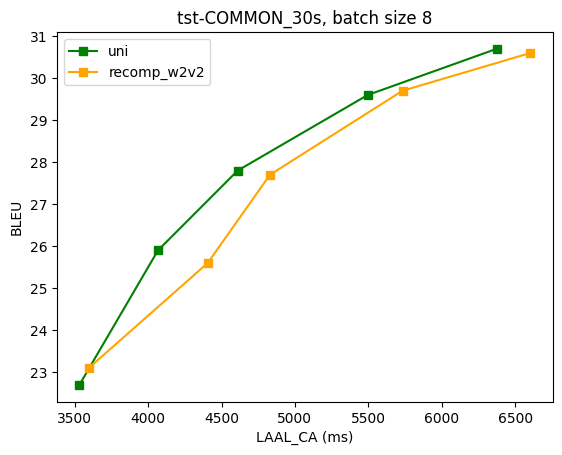

In [14]:
# tst-COMMON_30s, bsz 8, uni w2v2 vs recomp w2v2 & bi w2v2 recomp last
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.7, 25.9, 27.8, 29.6, 30.7]
df['LAAL_CA'] = [3532, 4067, 4610, 5496, 6375]
dfs['uni'] = df

## recomp w2v2
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [23.1, 25.6, 27.7, 29.7, 30.6]
df['LAAL_CA'] = [3596, 4406, 4830, 5733, 6604]
dfs['recomp_w2v2'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 8')
plt.legend()

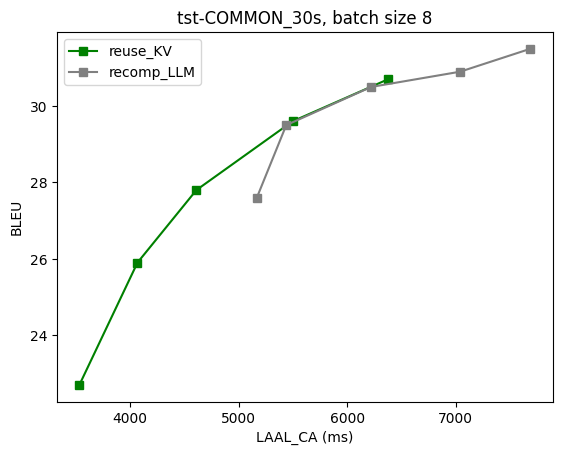

In [18]:
# tst-COMMON_30s, bsz 8, reuse KV vs recomp LLM
dfs = {}

## reuse KV
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.7, 25.9, 27.8, 29.6, 30.7]
df['LAAL_CA'] = [3532, 4067, 4610, 5496, 6375]
dfs['reuse_KV'] = df

## recomp LLM
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [27.6, 29.5, 30.5, 30.9, 31.5]
df['LAAL_CA'] = [5167, 5438, 6220, 7041, 7688]
dfs['recomp_LLM'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 8')
plt.legend()

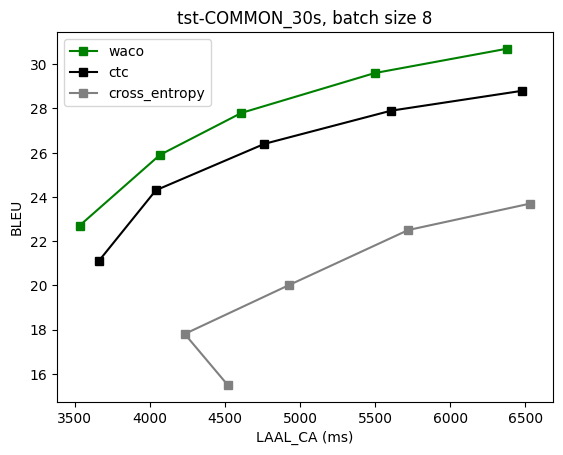

In [4]:
# tst-COMMON_30s, bsz 8, stage 0 pretraining
dfs = {}

## waco
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.7, 25.9, 27.8, 29.6, 30.7]
df['LAAL_CA'] = [3532, 4067, 4610, 5496, 6375]
dfs['waco'] = df

## ctc
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [21.1, 24.3, 26.4, 27.9, 28.8]
df['LAAL_CA'] = [3660, 4040, 4763, 5606, 6479]
dfs['ctc'] = df

## cross entropy
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [15.5, 17.8, 20.0, 22.5, 23.7]
df['LAAL_CA'] = [4517, 4232, 4923, 5720, 6534]
dfs['cross_entropy'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 8')
plt.legend()

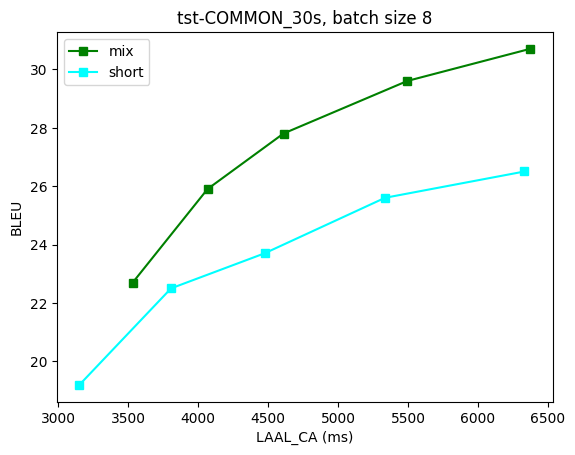

In [10]:
# tst-COMMON_30s, bsz 8, mix vs short & long
dfs = {}

## mix
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.7, 25.9, 27.8, 29.6, 30.7]
df['LAAL_CA'] = [3532, 4067, 4610, 5496, 6375]
dfs['mix'] = df

## short
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [19.2, 22.5, 23.7, 25.6, 26.5]
df['LAAL_CA'] = [3151, 3806, 4475, 5336, 6333]
dfs['short'] = df

## long
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [19.2, 22.5, 23.7, 25.6, 26.5]
df['LAAL_CA'] = [3151, 3806, 4475, 5336, 6333]
dfs['long'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 8')
plt.legend()

### Hold-N

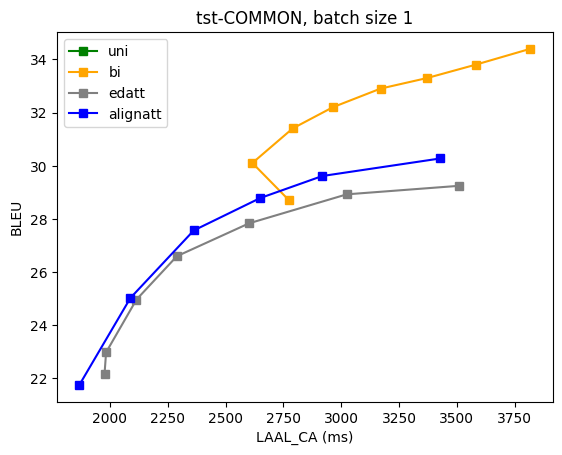

In [4]:
# tst-COMMON, bsz 1
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = []
df['LAAL_CA'] = []
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [28.7, 30.1, 31.4, 32.2, 32.9, 33.3, 33.8, 34.4]
df['LAAL_CA'] = [2774, 2616, 2790, 2964, 3170, 3372, 3581, 3818]
dfs['bi'] = df

## edatt
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [22.15, 22.97, 24.96, 26.59, 27.83, 28.92, 29.24]
df['LAAL_CA'] = [1976.6, 1983.4, 2114.9, 2289.4, 2602.0, 3024.1, 3508.5]
dfs['edatt'] = df

## alignatt
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [21.75, 25.02, 27.56, 28.78, 29.61, 30.27]
df['LAAL_CA'] = [1868.2, 2088.7, 2362.4, 2649.7, 2918.3, 3427.8]
dfs['alignatt'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON, batch size 1')
plt.legend()

In [ ]:
# tst-COMMON_30s, bsz 2
dfs = {}

## uni
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = []
df['LAAL_CA'] = []
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['BLEU', 'LAAL', 'LAAL_c'])
df['BLEU'] = [23.7, 25.1, 26.5, 27.8, 28.9, 29.7, 30.5, 30.9]
df['LAAL_CA'] = [5952, 6244, 6471, 6954, 7881, 7610, 8007, 8496]
dfs['bi'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 8')
plt.legend()

## COMET - LAAL_CA

In [ ]:
# tst-COMMON_30s, bsz 8
dfs = {}

## uni
df = pd.DataFrame(columns=['COMET', 'LAAL', 'LAAL_c'])
df['BLEU'] = [0.30, 0.33, 0.38, 0.42, 0.45, 0.47, 0.49]
df['LAAL_CA'] = [3724, 4060, 4589, 5099, 5574, 6082, 6609]
dfs['uni'] = df

## bi
df = pd.DataFrame(columns=['COMET', 'LAAL', 'LAAL_c'])
df['BLEU'] = [0.57, 0.58, 0.60, 0.61, 0.63, 0.63, 0.64]
df['LAAL_CA'] = [7741, 7559, 7649, 8030, 8446, 9016, 9509]
dfs['bi'] = df

## plot 
for key in dfs:
    df = dfs[key]
    color = colors[key]
    # plt.plot(df['LAAL'], df['BLEU'], color=color, linestyle='dotted')
    plt.plot(df['LAAL_CA'], df['BLEU'], color=color, linestyle='solid', label=key, marker='s')
plt.xlabel('LAAL_CA (ms)')
plt.ylabel('BLEU')
plt.title('tst-COMMON_30s, batch size 8')
plt.legend()